In [ ]:
#import google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_path="/content/drive/MyDrive/SoundLog"

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
audio_path = "/content/drive/MyDrive/SoundLog/220727_212925.wav"
y, sr = librosa.load(audio_path, sr=22050)
ipd.Audio(y, rate=sr)

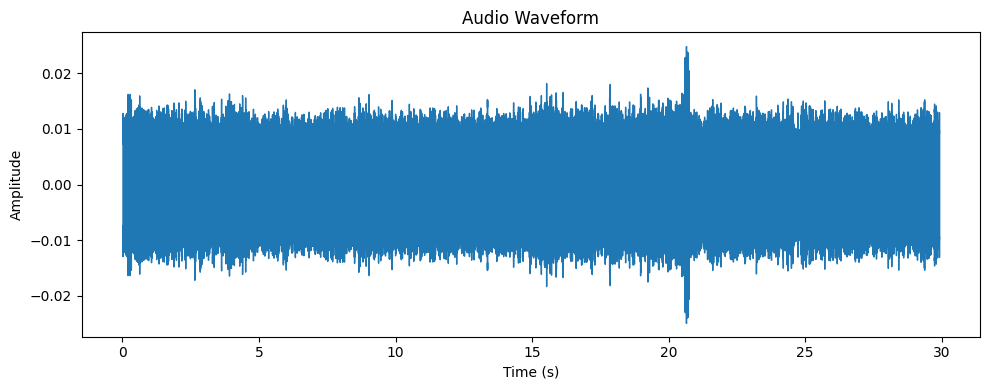

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Audio Waveform")
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import librosa
import librosa.display
from collections import Counter

# Function to add Gaussian noise
def add_noise(audio, noise_level=0.005):
    noise = np.random.randn(len(audio)) * noise_level
    return audio + noise

# Path to dataset
dataset_path = "/content/drive/MyDrive/SoundLog"

X = []
y = []
class_counts = Counter()

# Loop through each actor folder
for actor_folder in os.listdir(dataset_path):
    actor_path = os.path.join(dataset_path, actor_folder)

    if not os.path.isdir(actor_path):
        continue  # Skip non-directory files

    # Loop through each audio file
    for file in os.listdir(actor_path):
        file_path = os.path.join(actor_path, file)

        if not file.endswith(".wav"):
            continue  # Skip non-audio files

        # Load audio
        audio, sr = librosa.load(file_path, sr=22050)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)

        # Combine all features
        features = np.concatenate((mfccs.mean(axis=1), chroma.mean(axis=1), spectral_contrast.mean(axis=1)))

        # Extract emotion label (assuming it's the folder name)
        emotion = actor_folder  # Changed to use folder name as label

        # Append to dataset
        X.append(features)
        y.append(emotion)
        class_counts[emotion] += 1

        # If class has fewer samples, augment with noise
        if class_counts[emotion] < 500:  # Adjust this threshold
            audio_noisy = add_noise(audio)
            mfccs_noisy = librosa.feature.mfcc(y=audio_noisy, sr=sr, n_mfcc=40)
            chroma_noisy = librosa.feature.chroma_stft(y=audio_noisy, sr=sr)
            spectral_contrast_noisy = librosa.feature.spectral_contrast(y=audio_noisy, sr=sr)

            features_noisy = np.concatenate((mfccs_noisy.mean(axis=1), chroma_noisy.mean(axis=1), spectral_contrast_noisy.mean(axis=1)))

            X.append(features_noisy)
            y.append(emotion)
            class_counts[emotion] += 1  # Update count after augmentation

print("Balanced Class Distribution:", class_counts)

Balanced Class Distribution: Counter()


In [ ]:
import os
import numpy as np
import librosa
import librosa.display
from collections import Counter

# Function to add Gaussian noise
def add_noise(audio, noise_level=0.005):
    noise = np.random.randn(len(audio)) * noise_level
    return audio + noise

# Path to dataset
dataset_path = "/content/drive/MyDrive/SoundLog"

X = []
y = []
class_counts = Counter()

# Loop through each actor folder
for actor_folder in os.listdir(dataset_path):
    actor_path = os.path.join(dataset_path, actor_folder)

    if not os.path.isdir(actor_path):
        continue  # Skip non-directory files

    # Loop through each audio file
    for file in os.listdir(actor_path):
        file_path = os.path.join(actor_path, file)

        if not file.endswith(".wav"):
            continue  # Skip non-audio files

        # Load audio
        audio, sr = librosa.load(file_path, sr=22050)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)

        # Combine all features
        features = np.concatenate((mfccs.mean(axis=1), chroma.mean(axis=1), spectral_contrast.mean(axis=1)))

        # Extract emotion label (assuming it's the folder name)
        emotion = actor_folder  # Changed to use folder name as label

        # Append to dataset
        X.append(features)
        y.append(emotion)
        class_counts[emotion] += 1

        # If class has fewer samples, augment with noise
        if class_counts[emotion] < 500:  # Adjust this threshold
            audio_noisy = add_noise(audio)
            mfccs_noisy = librosa.feature.mfcc(y=audio_noisy, sr=sr, n_mfcc=40)
            chroma_noisy = librosa.feature.chroma_stft(y=audio_noisy, sr=sr)
            spectral_contrast_noisy = librosa.feature.spectral_contrast(y=audio_noisy, sr=sr)

            features_noisy = np.concatenate((mfccs_noisy.mean(axis=1), chroma_noisy.mean(axis=1), spectral_contrast_noisy.mean(axis=1)))

            X.append(features_noisy)
            y.append(emotion)
            class_counts[emotion] += 1  # Update count after augmentation

print("Balanced Class Distribution:", class_counts)

Balanced Class Distribution: Counter()


In [ ]:
import os
import librosa
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Path to audio files
audio_dir = "/content/drive/MyDrive/SoundLog"

# Parameters
max_len = 130  # max number of MFCC frames
n_mfcc = 13    # number of MFCCs per frame

# Storage
X = []
y = []

# Load audio files and extract MFCCs
for file in os.listdir(audio_dir):
    if file.endswith(".wav"):
        file_path = os.path.join(audio_dir, file)
        label = file.split("_")[0]  # Assume label is part of filename (e.g., "dog_bark.wav")

        audio, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        mfcc = mfcc.T  # Transpose to shape (time, features)

        X.append(mfcc)
        y.append(label)

# Pad sequences
X = pad_sequences(X, maxlen=max_len, padding='post', dtype='float32')

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

print("X shape:", X.shape)  # (samples, timesteps, features)
print("y shape:", y_categorical.shape)


X shape: (248, 130, 13)
y shape: (248, 4)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking

model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_len, n_mfcc)))
model.add(LSTM(128))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model.fit(X, y_categorical, epochs=20, batch_size=16, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 130, 13)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,220 (286.02 KB)

 Trainable params: 73,220 (286.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.3406 - loss: 1.4219 - val_accuracy: 0.1400 - val_loss: 2.3474
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4585 - loss: 1.0125 - val_accuracy: 0.0000e+00 - val_loss: 2.9912
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5078 - loss: 0.9117 - val_accuracy: 0.0000e+00 - val_loss: 3.6325
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5843 - loss: 0.8881 - val_accuracy: 0.0000e+00 - val_loss: 3.6943
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6770 - loss: 0.8905 - val_accuracy: 0.0000e+00 - val_loss: 3.6943
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5910 - loss: 0.8425 - val_accuracy: 0.0200 - val_loss: 4.0049
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7013 - loss: 0.8253 - val_accuracy: 0.0200 - val_loss: 3.9723
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6678 - loss: 0.8379 - val_accu

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split # Import train_test_split

# Assuming X and y_categorical are already defined from previous cells

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42) # Split the data

# Define the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])), # Use X_train.shape
    BatchNormalization(),
    Dropout(0.3),

    LSTM(128, return_sequences=True),  # First additional LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True),  # Second additional LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64),  # Final LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(8, activation='softmax')  # Output layer (8 classes for emotions)
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 130, 128)       │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 130, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 130, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 130, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 130, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 130, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 130, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 130, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 130, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 290,600 (1.11 MB)

 Trainable params: 289,832 (1.11 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

# Assuming X and y_categorical are already defined from previous cells

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42) # Split the data

# Define the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])), # Use X_train.shape
    BatchNormalization(),
    Dropout(0.3),

    LSTM(128, return_sequences=True),  # First additional LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True),  # Second additional LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64),  # Final LSTM layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(y_train.shape[1], activation='softmax')  # Output layer with the correct number of classes
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 130, 128)       │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 130, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 130, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 130, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 130, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 130, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 130, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 130, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 130, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 290,468 (1.11 MB)

 Trainable params: 289,700 (1.11 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8528 - loss: 0.3687 - val_accuracy: 0.3800 - val_loss: 3.0557
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8868 - loss: 0.3327 - val_accuracy: 0.3600 - val_loss: 3.3541
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9030 - loss: 0.2503 - val_accuracy: 0.3600 - val_loss: 3.4441
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8817 - loss: 0.2986 - val_accuracy: 0.3800 - val_loss: 3.2867
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8684 - loss: 0.3131 - val_accuracy: 0.4400 - val_loss: 3.0772
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7983 - loss: 0.4588 - val_accuracy: 0.6000 - val_loss: 2.6444
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8596 - loss: 0.4348 - val_accuracy: 0.4000 - val_loss: 2.5189
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8299 - loss: 0.4435 - val_accuracy: 0.6200 - val_loss: 2.6805


In [ ]:
#Example of using RMSprop optimizer with adjusted learning rate:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.0005)  # Adjust learning rate as needed
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Example of Time Stretching
from librosa import effects

audio_stretched = effects.time_stretch(audio, rate=1.2)  # Stretch by 20%

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5058 - loss: 3.5441
Test Accuracy: 54.00%


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step


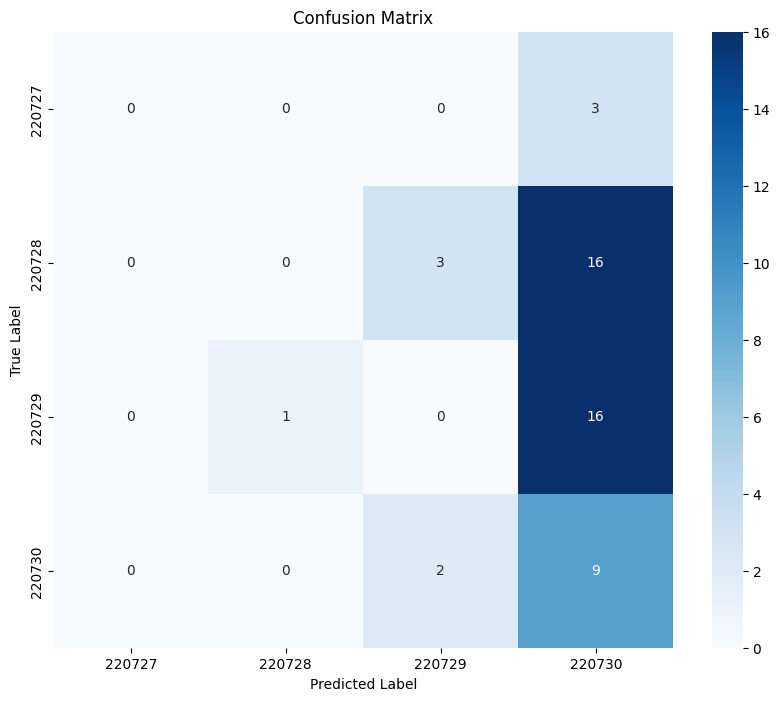

In [ ]:


import os
import librosa
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Path to audio files
audio_dir = "/content/drive/MyDrive/SoundLog"

# Parameters
max_len = 130  # max number of MFCC frames
n_mfcc = 13    # number of MFCCs per frame

# Storage
X = []
y = []

# Load audio files and extract MFCCs
for file in os.listdir(audio_dir):
    if file.endswith(".wav"):
        file_path = os.path.join(audio_dir, file)
        label = file.split("_")[0]  # Assume label is part of filename (e.g., "dog_bark.wav")

        audio, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        mfcc = mfcc.T  # Transpose to shape (time, features)

        X.append(mfcc)
        y.append(label)

# Pad sequences
X = pad_sequences(X, maxlen=max_len, padding='post', dtype='float32')

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Define the LSTM model (adjust as needed)
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (adjust epochs and batch size as needed)
# model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
import numpy as np
import librosa
from scipy import stats

# Load two audio files
y1, sr1 = librosa.load('/content/drive/MyDrive/SoundLog/220727_211424.wav', sr=None)
y2, sr2 = librosa.load('/content/drive/MyDrive/SoundLog/220727_212925.wav', sr=None)

# Compute RMS (loudness) frames
rms1 = librosa.feature.rms(y=y1)[0]
rms2 = librosa.feature.rms(y=y2)[0]

# Perform T-Test
t_stat, p_value = stats.ttest_ind(rms1, rms2, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference in loudness!")
else:
    print("No significant difference in loudness.")


T-statistic: 62.1294, P-value: 0.0000
Significant difference in loudness!
